In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rcParams['figure.dpi']= 150
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams['figure.figsize'] = [7, 7]
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'figure.autolayout': True})
import seaborn as sns

In [3]:
sns.set(style='whitegrid', font_scale=1.4, rc={"lines.linewidth": 1.5,'lines.markersize': 4.0, 'axes.facecolor': 'white'}, font="serif")

In [4]:
import pickle
import numpy as np
from orphics.stats import FisherMatrix
from six.moves import configparser
import six

if six.PY2:
    ConfigParser = configparser.SafeConfigParser
else:
    ConfigParser = configparser.ConfigParser

In [5]:
pwd

'/Users/dylan/Development/szar/ipynbs'

In [8]:
fisherfile_so = '../datatest/fisher_dc_SO-v3_goal_40_owl2_v0.6_2019-01-29-13-20-00-EST.pkl'
oldfisherfile_so = '../data/savedFisher_SO-v3-goal-40_grid-owl2_owl2_v1.0_planck_mwwcdm_py3.pkl'
paramsfile_so = '../datatest/SO-v3-goal-40_grid-owl2_v0.6_params_2019-01-29-13-20-00-EST.npy'
fisherfile_ab_so = '../datatest/fisher_dc_SO-v3_goal_40_owl2_v0.6_2019-01-28-14-58-20-EST_abias.pkl'
paramsfile_ab_so = '../datatest/SO-v3-goal-40_grid-owl2_v0.6_params_2019-01-28-14-58-20-EST_abias.npy'

params_so = np.load(paramsfile_so).item()
params_ab_so = np.load(paramsfile_ab_so).item()

with open(fisherfile_so, 'rb') as pickle_file:
    fisher_so = pickle.load(pickle_file)

with open(fisherfile_ab_so, 'rb') as pickle_file:
    fisher_ab_so = pickle.load(pickle_file)
    
with open(oldfisherfile_so, 'rb') as pickle_file:
    oldfisher_so = pickle.load(pickle_file)

In [9]:
fisherfile_s4 = '../datatest/fisher_dc_updated_abund-clustering_2018-11-23-16-13-15-EST.pkl'
oldfisherfile_s4 = '../data/savedFisher_S4-1.0-CDT_grid-owl2_owl2_v0.7_planck_mwwcdm_py3.pkl'
paramsfile_s4 = '../datatest/S4-1.0-CDT_grid-owl2_v0.6_params_2018-11-20-11-42-30-EST.npy'
fisherfile_ab_s4 = '../datatest/fisher_dc_updated_abund-clustering_abias_2018-11-28-16-40-01-EST.pkl'
paramsfile_ab_s4 = '../datatest/S4-1.0-CDT_grid-owl2_v0.6_params_2018-11-27-15-10-26-EST.npy'

params_s4 = np.load(paramsfile_s4).item()
params_ab_s4 = np.load(paramsfile_ab_s4).item()

with open(fisherfile_s4, 'rb') as pickle_file:
    fisher_s4 = pickle.load(pickle_file)

with open(fisherfile_ab_s4, 'rb') as pickle_file:
    fisher_ab_s4 = pickle.load(pickle_file)
    
with open(oldfisherfile_s4, 'rb') as pickle_file:
    oldfisher_s4 = pickle.load(pickle_file)

In [10]:
fisher_so = FisherMatrix(fisher_so.values, fisher_so.columns.values.tolist())
fisher_ab_so = FisherMatrix(fisher_ab_so.values, fisher_ab_so.columns.values.tolist())

fisher_s4 = FisherMatrix(fisher_s4.values, fisher_s4.columns.values.tolist())
fisher_ab_s4 = FisherMatrix(fisher_ab_s4.values, fisher_ab_s4.columns.values.tolist())

/Users/dylan/Development/orphics/orphics/stats.py:204: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


In [12]:
oldfisher_so = FisherMatrix(oldfisher_so[1], oldfisher_so[0])
oldfisher_s4 = FisherMatrix(oldfisher_s4[1], oldfisher_s4[0])

In [13]:
constraints_so = fisher_so.sigmas()
constraints_ab_so = fisher_ab_so.sigmas()
oldconstraints_so = oldfisher_so.sigmas()

constraints_s4 = fisher_s4.sigmas()
constraints_ab_s4 = fisher_ab_s4.sigmas()
oldconstraints_s4 = oldfisher_s4.sigmas()

In [15]:
def _get_latex_params(inifile, fish_sect='fisher-clustering'):
    config = ConfigParser()
    config.optionxform=str
    config.read(inifile)

    latex_param_list = config.items(fish_sect, 'paramLatexList')[1][1].split(',')
    return latex_param_list

INI = '../input/pipeline.ini'

latex_params = _get_latex_params(INI)
latex_paramdict = {}
for index,key in enumerate(params_so):
    latex_paramdict[key] = latex_params[index]

In [17]:
params_to_plot = ['H0', 'mnu', 'omch2', 'w0', 'wa', 'ns']
constraints_to_plot_so = [constraints_so[par] for par in params_to_plot]
constraints_to_plot_s4 = [constraints_s4[par] for par in params_to_plot]
latex_to_plot = ['$' + latex_paramdict[key] + '$' for key in params_to_plot]

In [18]:
import pandas as pd

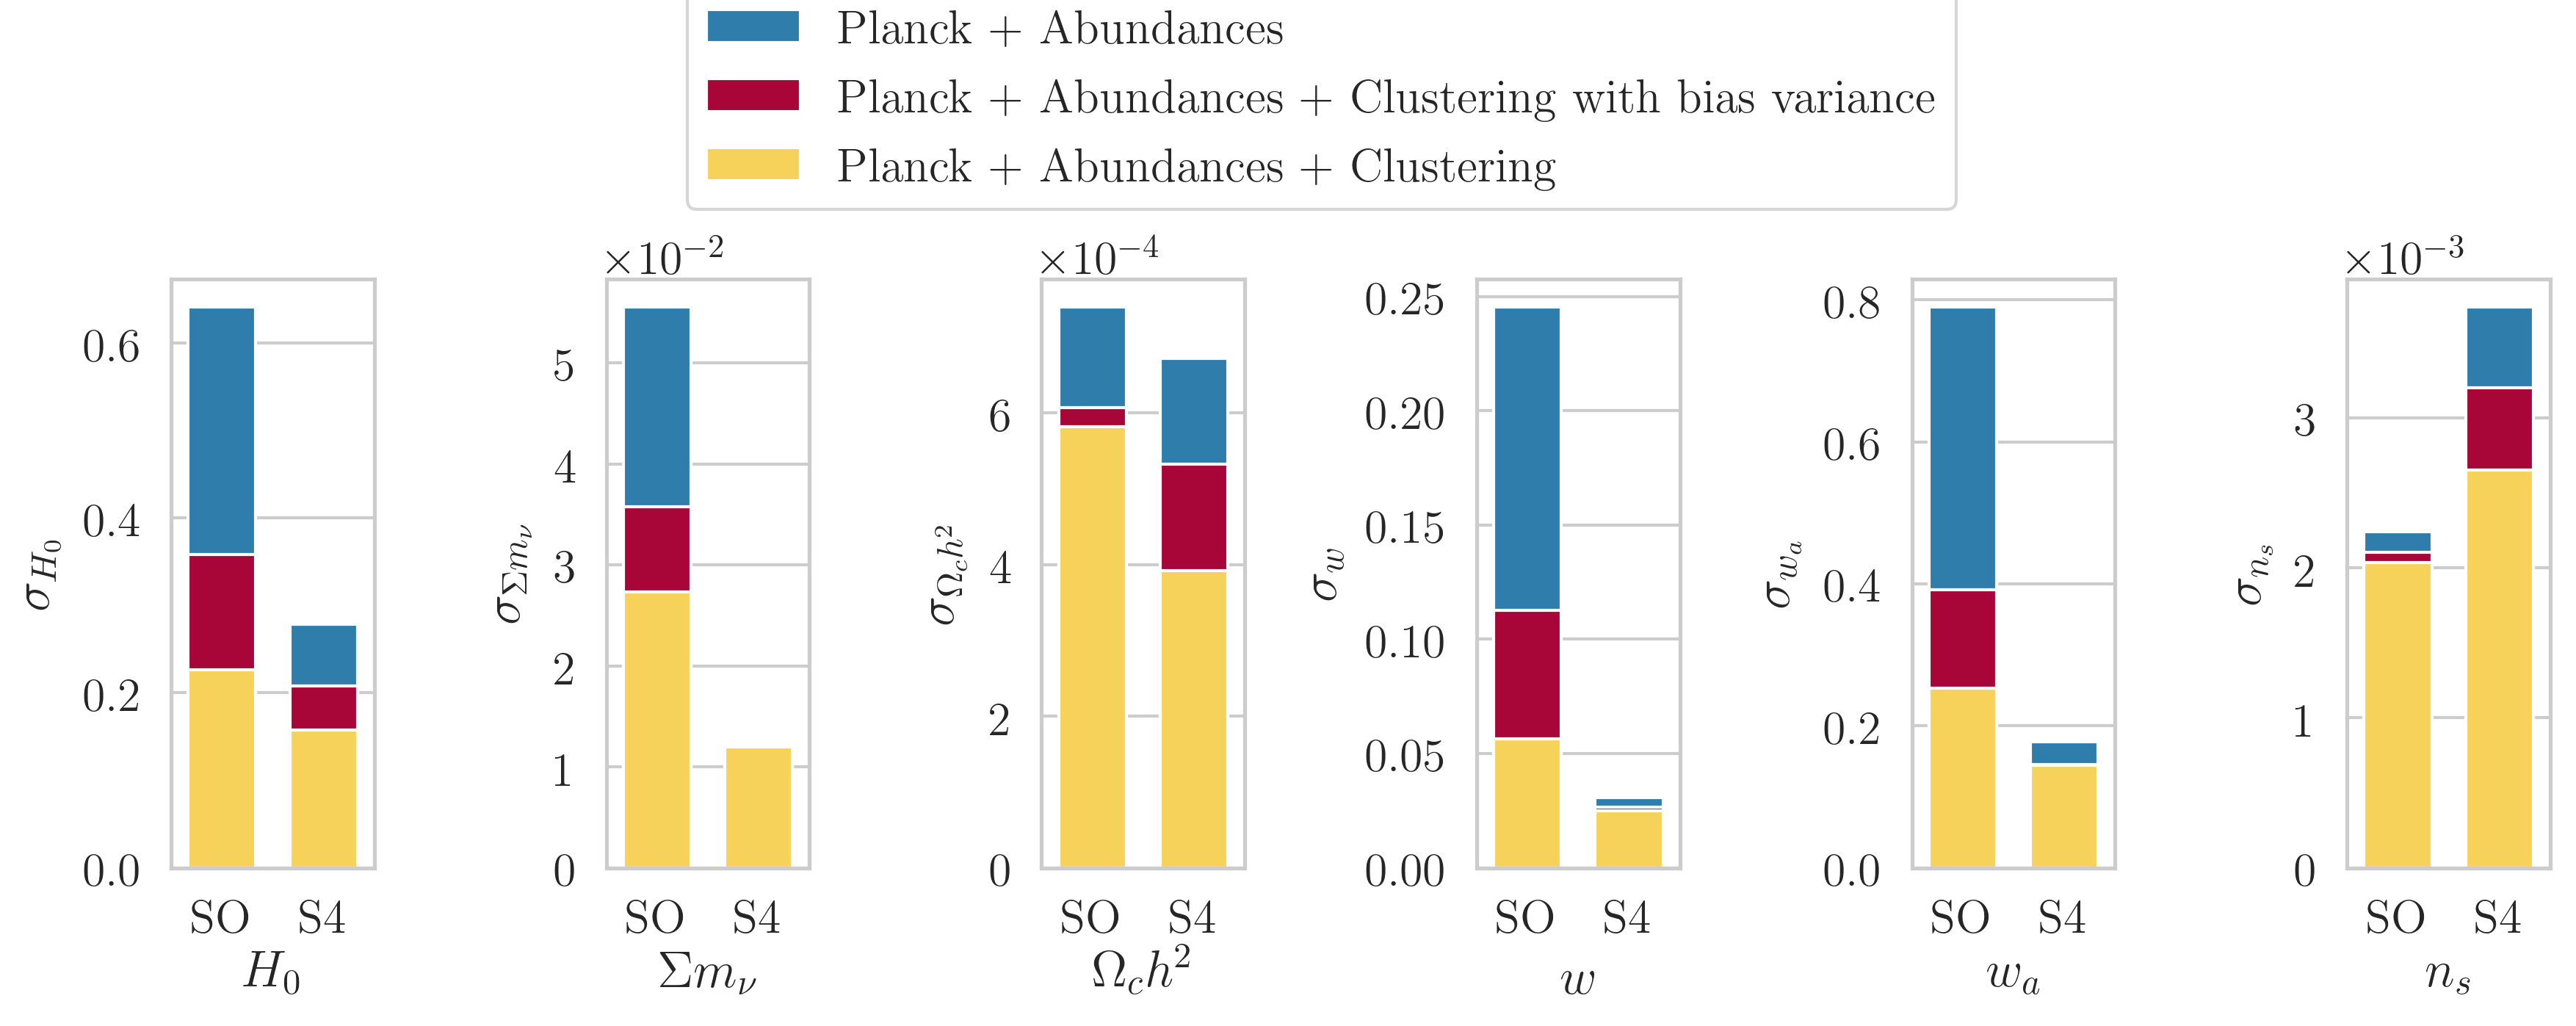

In [61]:
fig,axes = plt.subplots(1,len(params_to_plot), figsize=(12, 4))

for index,param in enumerate(params_to_plot):
    latex = '$' + latex_paramdict[param] + '$'
    wth = 1
    #sigmas = np.array([constraints_ab[param],constraints[param], oldconstraints[param]])
    axes[index].bar(0, oldconstraints_so[param], width=wth, label='Planck + Abundances'
                    , color='#2e7daa')
    axes[index].bar(0, constraints_ab_so[param], width=wth, 
                    label='Planck + Abundances + Clustering with bias variance', color='#a80639')
    axes[index].bar(0, constraints_so[param], width=wth, 
                    label='Planck + Abundances + Clustering', color='#f7d25b')
    
    axes[index].bar(1.5, oldconstraints_s4[param], width=wth 
                    , color='#2e7daa')
    axes[index].bar(1.5, constraints_ab_s4[param], width=wth, 
                     color='#a80639')
    axes[index].bar(1.5, constraints_s4[param], width=wth, 
                     color='#f7d25b')

    axes[index].set_xlabel(latex)
    #axes[index].xaxis.set_ticks_position('none') 
    axes[index].set_xticks((0,1.5))
    axes[index].set_xticklabels(('SO', 'S4'))
    axes[index].set_xlim(-(wth + wth/2)/2 , 1.5 +(wth + wth/2)/2)
    axes[index].set_ylabel(r'$\sigma_{'+latex_paramdict[param]+'}$')
    axes[index].grid(False, axis='x')
    
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(.5, 0.9))
fig.tight_layout()
#fig.savefig('barplot.eps', bbox_inches='tight')

In [ ]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir+'/bin') 
from deeos_to_gamma import get_gamma_constraint

In [ ]:
sigma_gamma_old = get_gamma_constraint(oldfisher, oldfisher.columns.values)
sigma_gamma = get_gamma_constraint(fisher, fisher.columns.values)
sigma_gamma_ab = get_gamma_constraint(fisher_ab, fisher_ab.columns.values)

In [ ]:
wth = 1
plt.bar(0, sigma_gamma_old, width=1, label='Pl+Ab'
                    , color='#2e7daa')
plt.bar(0, sigma_gamma_ab, width=wth, 
                label='Pl+Ab+Cl \n w/ $a_\mathrm{bias}$', color='#a80639')
plt.bar(0, sigma_gamma, width=wth, 
                label='Pl+Ab+Cl', color='#f7d25b')
plt.xlabel(r'$\gamma$')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlim(-(wth + wth/2)/2 , (wth + wth/2)/2)
plt.ylabel(r'$\sigma_{\gamma}$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.2))
fig = plt.gcf()
fig.set_size_inches(13/7 + 1.8,4)
fig.tight_layout()
#fig.savefig('gamma_barplot.svg', bbox_inches='tight')

In [ ]:
from orphics.io import dict_from_section,list_from_config
Config = ConfigParser()
Config.optionxform=str
Config.read(INI)
clttfile = Config.get('general','clttfile')
constDict = dict_from_section(Config,'constants')

fparams = {}
for (key, val) in Config.items('params'):
    if ',' in val:
        param, step = val.split(',')
        fparams[key] = float(param)
    else:
        fparams[key] = float(val)

In [ ]:
latex_dict_to_plot={}
for ind,key in enumerate(params_to_plot):
    latex_dict_to_plot[key] = latex_to_plot[ind]

In [ ]:
from orphics.stats import corner_plot

In [ ]:
fishers_to_plot = [oldfisher, fisher_ab, fisher]
labels = ['Pl+Ab', r'Pl+Ab+Cl w/$a_{bias}$', 'Pl+Ab+Cl']
colors = ['#2e7daa','#a80639','#f7d25b']
corner_plot(fishers_to_plot, labels, colors=colors, fid_dict=fparams, params=params_to_plot,
            show_1d=False, loc='upper right', latex_dict=latex_dict_to_plot, thk=3,
            labelsize=22, rotate_xlabels=True, xpad=30, save_file='paper_cornerplot_so.pdf',
            fileformat='pdf')